In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Data upload
data = pd.DataFrame({
    'Location': ['Bengaluru', 'ITO, Delhi', 'New Ind Town, Faridabad'],
    'Year': [2023, 2023, 2022],
    'Month': [2, 2, 10],
    'Day': [23, 22, 2],
    'Hour': ['8:30', '14:00', '10:00'],
    'xgboost': ['Unhealthy', 'Very Unhealthy', 'Unhealthy'],
    'randomforest': ['Severe', 'Very Unhealthy', 'Unhealthy'],
    'dnn': ['Moderate', 'Very Unhealthy', 'Very Unhealthy'],
    'decisiontree': ['Severe', 'Severe', 'Very Unhealthy'],
    'lstm': ['Moderate', 'Very Unhealthy', 'Very Unhealthy'],
    'mlp': ['Moderate', 'Very Unhealthy', 'Very Unhealthy']
})

model_columns = ['xgboost', 'randomforest', 'dnn', 'decisiontree', 'lstm', 'mlp']

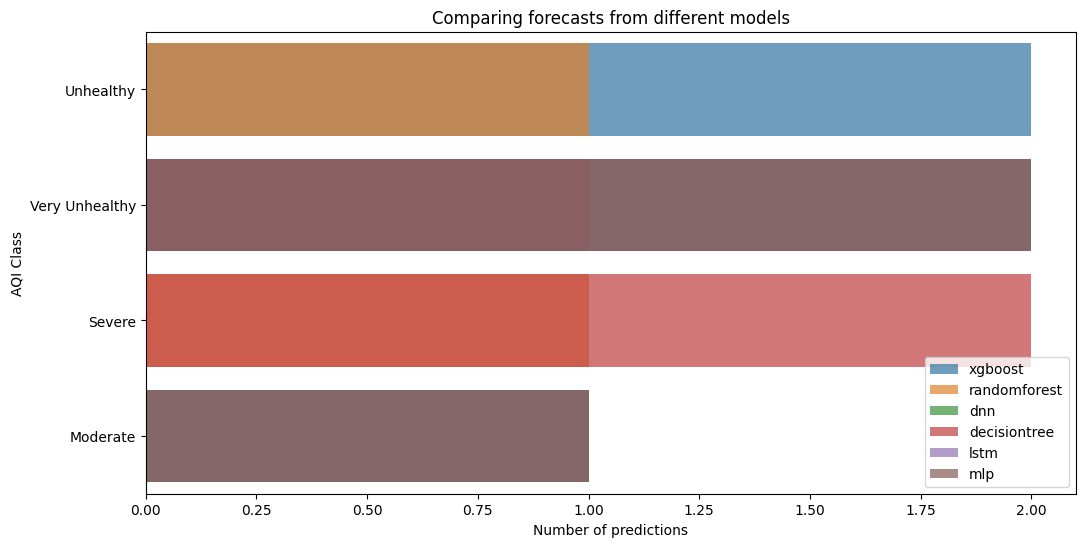

In [9]:
# 1. Bar chart – Comparison of model predictions for each location
plt.figure(figsize=(12, 6))
for model in model_columns:
    sns.countplot(y=data[model], label=model, alpha=0.7)

plt.title("Comparing forecasts from different models")
plt.xlabel("Number of predictions")
plt.ylabel("AQI Class")
plt.legend()
plt.show()

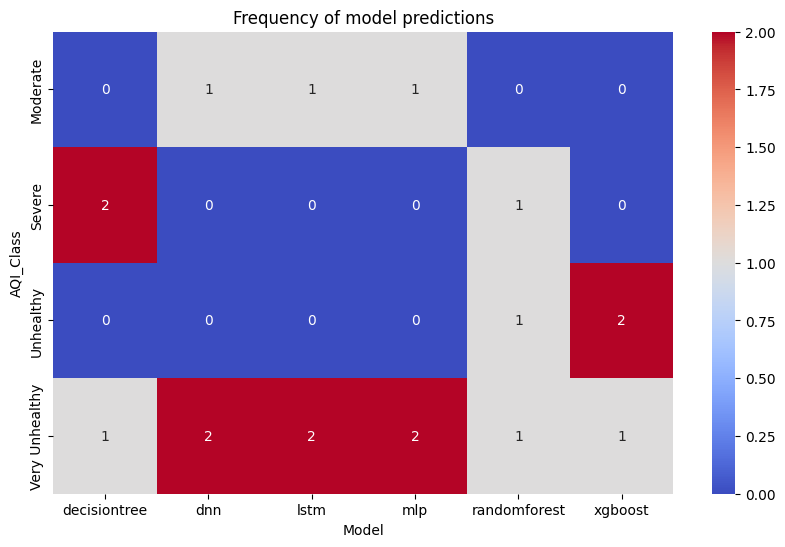

In [10]:
# 2. Heatmap – Frequency of AQI class predictions
df_melted = data.melt(id_vars=["Location"], value_vars=model_columns, var_name="Model", value_name="AQI_Class")
plt.figure(figsize=(10, 6))
heatmap_data = df_melted.pivot_table(index="AQI_Class", columns="Model", aggfunc="size", fill_value=0)
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt="d")
plt.title("Frequency of model predictions")
plt.show()

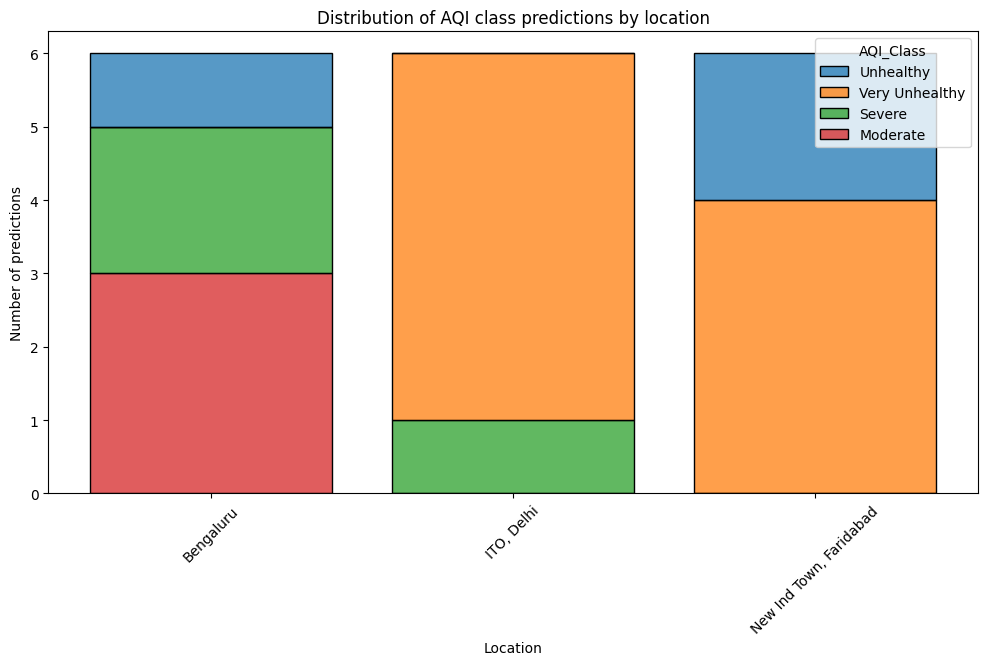

In [11]:
# 3. Stacked Bar Chart – Distribution of model predictions by location
plt.figure(figsize=(12, 6))
df_melted = data.melt(id_vars=["Location"], value_vars=model_columns, var_name="Model", value_name="AQI_Class")
sns.histplot(data=df_melted, x="Location", hue="AQI_Class", multiple="stack", shrink=0.8)
plt.title("Distribution of AQI class predictions by location")
plt.xlabel("Location")
plt.ylabel("Number of predictions")
plt.xticks(rotation=45)
plt.show()

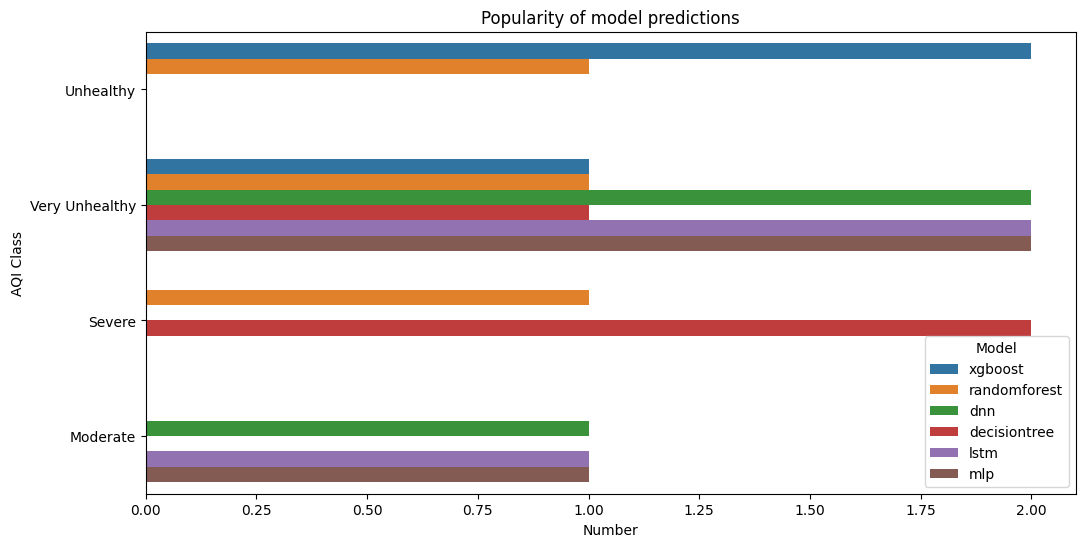

In [12]:
# 4. Count Plot – Analysis of the popularity of model predictions
plt.figure(figsize=(12, 6))
sns.countplot(y=df_melted["AQI_Class"], hue=df_melted["Model"])
plt.title("Popularity of model predictions")
plt.xlabel("Number")
plt.ylabel("AQI Class")
plt.legend(title="Model")
plt.show()